In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import convolve2d
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['white', 'blue', 'red'])  # Define colors for the grid

In [31]:
def run_simulation_with_aging_vacancy_and_max_iterations(grid, kernel, jt, max_age, max_iterations):
    size = grid.shape[0]
    age_grid = np.zeros_like(grid)
    iterations = 0
    while True:
        # Check if maximum iterations have been reached
        if iterations >= max_iterations:
            break

        sum_neighbors_blue = convolve2d(grid == 1, kernel, mode='same', boundary='wrap')
        sum_neighbors_red = convolve2d(grid == 2, kernel, mode='same', boundary='wrap')
        fraction_blue = sum_neighbors_blue / (sum_neighbors_blue + sum_neighbors_red + 1e-6)
        fraction_red = sum_neighbors_red / (sum_neighbors_blue + sum_neighbors_red + 1e-6)
        unhappy_blue = (grid == 1) & (fraction_blue < jt)
        unhappy_red = (grid == 2) & (fraction_red < jt)
        unhappy = unhappy_blue | unhappy_red
        if np.sum(unhappy) == 0:
            break
        age_grid[~unhappy] += 1
        age_grid[unhappy] = 0
        move_probability = 1 / (age_grid + 2)
        moving_agents = (np.random.rand(size, size) < move_probability) & unhappy
        empty = (grid == 0)
        for i in range(size):
            for j in range(size):
                if moving_agents[i, j]:
                    empty_cells = np.argwhere(empty)
                    if empty_cells.size > 0:
                        new_pos = empty_cells[np.random.choice(len(empty_cells))]
                        grid[new_pos[0], new_pos[1]] = grid[i, j]
                        grid[i, j] = 0
                        empty[new_pos[0], new_pos[1]] = False
                        empty[i, j] = True
        iterations += 1
    return grid, iterations, age_grid

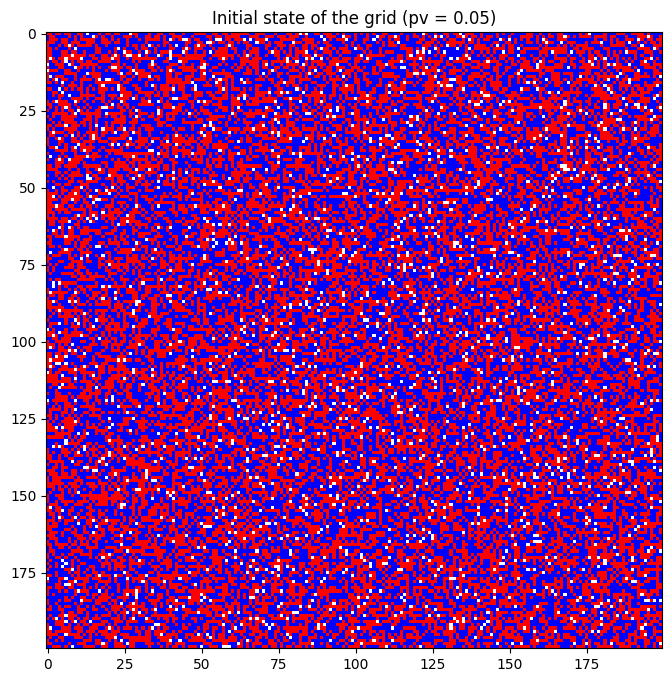

In [38]:
# Set parameters
size = 200  # Size of the grid: size * size
pv = 0.05  # Percentage of vacancy
max_iterations = 500  # Maximum number of iterations
# jt = 0.71  # Threshold for unhappy agents
jt = 0.86  # Threshold for unhappy agents
max_age = 10 

# Initialize the grid
total_cells = size * size
n_vacant = int(total_cells * pv)
n_agents = total_cells - n_vacant
grid = np.zeros((size, size))
indices = np.random.choice(total_cells, n_agents, replace=False)
half = len(indices) // 2
grid.ravel()[indices[:half]] = 1
grid.ravel()[indices[half:]] = 2

# Kernel for convolution
kernel = np.ones((3, 3))
kernel[1, 1] = 0

# Plot the initial and final states of the grid
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap=cmap)
plt.title('Initial state of the grid (pv = {:.2f})'.format(pv))
plt.show()

In [39]:
# Run the simulation with the max iterations parameter
final_grid, iterations, age_grid = run_simulation_with_aging_vacancy_and_max_iterations(grid, kernel, jt, max_age, max_iterations)


plt.figure(figsize=(8, 8))
plt.imshow(final_grid, cmap=cmap)
plt.title('Final state of the grid with aging (pv = {:.2f})'.format(pv))
plt.show()

print(f"Number of iterations: {iterations}")

KeyboardInterrupt: 